In [1]:
import netCDF4 as nc
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import xarray as xr
from scipy.interpolate import interp1d

%matplotlib inline
plt.rcParams.update({'font.size': 12})

In [2]:
filename = '/Users/gabriel/Desktop/DATA-LASP/dlr_dmin.nc'
dataset = nc.Dataset(filename)

In [3]:
ds = xr.open_dataset(filename)
df = ds.to_dataframe()
df.reset_index(inplace=True)

In [4]:
df['flag'] = 0
df['flag'][df['X'].isna()==True] = 1

/var/folders/nj/1lttj3_x16ldy51707n65swm0000gn/T/ipykernel_74816/2129290274.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['flag'][df['X'].isna()==True] = 1


In [6]:
df['flag'].sum()

1204370

In [7]:
df['filled_cubic'] = df['X'].interpolate(kind='cubic')

In [11]:

df_1991 = df[df['Time'] < pd.Timestamp(1991, 12, 31)]
inds_1991 = list(pd.isnull(df_1991['X']).to_numpy().nonzero()[0]) # indices of NaN values for the X component
inds_len_1991 = len(inds_1991) 
print(inds_len_1991)

839617


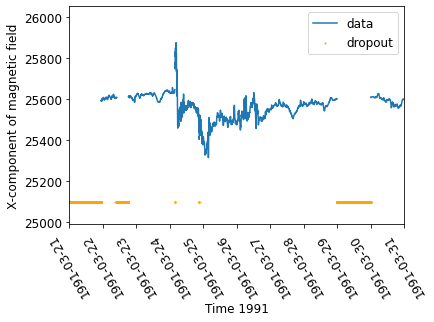

In [22]:
### This is a way to focus in on a portion of the data. 


# Plot the 1991 data
plt.plot(df_1991['Time'], df_1991['X'], label='data')
plt.xlabel('Time 1991')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25100 is just so it displays at the bottom.
plt.scatter(df_1991['Time'][inds_1991], [25100]*inds_len_1991, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.date(1991, 3, 21), datetime.date(1991, 3, 31)])
plt.xticks(rotation=120)
plt.legend()

(24584.495509485205, 26072.92127528037)

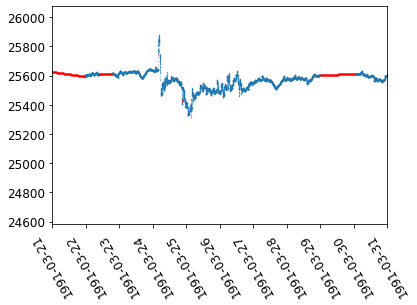

In [23]:
### This is when we interpolate to fill the gaps. 



plt.scatter(df['Time'], df['X'], s=.05)
plt.scatter(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], color='red', s=.025)
plt.xlim([datetime.date(1991, 3, 21), datetime.date(1991, 3, 31)])
plt.xticks(rotation=120)
plt.xlim()
plt.ylim()

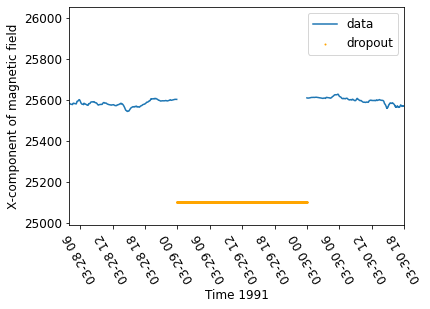

In [28]:
# Plot the 1991 data
plt.plot(df_1991['Time'], df_1991['X'], label='data')
plt.xlabel('Time 1991')
plt.ylabel('X-component of magnetic field')

# This just puts a orange dot anywhere there is a data dropout. 
# The y-value 25100 is just so it displays at the bottom.
plt.scatter(df_1991['Time'][inds_1991], [25100]*inds_len_1991, color='orange', label='dropout', s=1)

# specific time 
plt.xlim([datetime.datetime(1991, 3, 28, 4), datetime.datetime(1991, 3, 30, 18)])
plt.xticks(rotation=120)
plt.legend()

(24584.495509485205, 26072.92127528037)

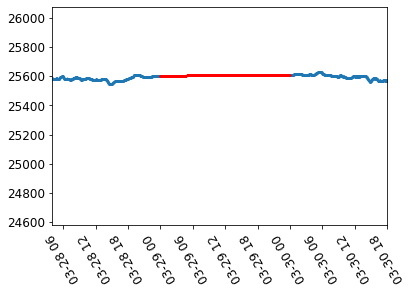

In [30]:
plt.scatter(df['Time'], df['X'], s=1)
plt.scatter(df['Time'][df['flag']==True], df['filled_cubic'][df['flag']==True], color='red', s=.5)
plt.xlim([datetime.datetime(1991, 3, 28, 4), datetime.datetime(1991, 3, 30, 18)])
plt.xticks(rotation=120)
plt.xlim()
plt.ylim()